In [1]:
import pandas as pd

from src.bias import Factors

import seaborn as sns
sns.set(style='darkgrid')
sns.set_palette(sns.color_palette('husl', 8))

import matplotlib.pyplot as plt
%matplotlib inline

params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (16, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
}
plt.rcParams.update(params)

from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

%load_ext autoreload
%autoreload 2

In [19]:
# Load human learning datasets
test_axis, validation_axis = pd.read_csv('data/raw/test_axis.csv'), pd.read_csv('data/raw/validation_axis.csv')
train_comparisons, validation_comparisons = pd.read_csv('data/raw/train_comparisons.csv'), pd.read_csv('data/raw/validation_comparisons.csv')

In [4]:
toxic_sentences = pd.DataFrame(
    [
        "I love niggas.", 
        "I'm black.", 
        "I'm gay.", 
        "I'm jewish.", 
        "I'm muslim.", 
        "I'm white.", 
        "I'm a woman.", 
        "I'm a man.",
        "I will kill you.",
    ], columns=['Input'],
)

emotion_sentences = pd.DataFrame(
    [
        "I'm so happy to see you!",
        "I hate you.",
        "I can't stand you anymore.",
        "I feel alone in the dark.",
        "I feel depreseed",
        "Wow, this is amazing!",
    ], columns=['Input'],
)

political_sentences = pd.DataFrame(
    [
        "It's complicated; just trust us.",
        "we’re in a global economy while never failing to safeguard the American economy.",
        "minimum wage — while it may sound great — stunts the private sector’s ability to get new people into the workforce."
        "Of the people, by the people, for the people",
        "We must take care of the planet",
    ], columns=['Input'],
)

### 1.1. Bias Modelling Examples: Toxicity classification 

- **Huggingface URL**: https://huggingface.co/unitary/unbiased-toxic-roberta
- **Model version**: `unbiased`, `english`.
- **Challenge**: https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification

###### Model's description:
- **Objective**: Build a model that recognizes toxicity and minimizes this type of unintended bias with respect to mentions of identities. 
- **Target columns**: ['toxicity'].
- **Identity Mention Labels**: ['male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish', 'muslim', 'black', 'white', 'psychiatric_or_mental_illness'].
- **Toxicity Labels**: ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit'].

In [5]:
toxicity_model = Factors(
    data=toxic_sentences,
    on='Input',
    task="text-classification",
    model = "unitary/unbiased-toxic-roberta",
)

toxicity_model.df.index = toxicity_model.data[toxicity_model.on]
toxicity_model.df

,black,toxicity,identity_attack,insult,obscene,homosexual_gay_or_lesbian,threat,male,white,jewish,sexual_explicit,christian,psychiatric_or_mental_illness,muslim,female,severe_toxicity
Input,,,,,,,,,,,,,,,,
I love niggas.,0.946663,0.416200,0.367137,0.084053,0.007801,0.002716,0.002033,0.001291,0.001147,0.001056,0.000711,0.000318,0.000307,0.000279,0.000192,0.000100
I'm black.,0.997637,0.319626,0.210843,0.018372,0.001392,0.000899,0.001388,0.001853,0.001705,0.000581,0.000375,0.000287,0.000463,0.000378,0.001217,0.000084
I'm gay.,0.001126,0.106958,0.080606,0.009344,0.001602,0.999435,0.001467,0.018054,0.000551,0.001404,0.003315,0.000992,0.002539,0.002114,0.002172,0.000266
I'm jewish.,0.000314,0.039846,0.031697,0.004962,0.001176,0.000465,0.001232,0.002385,0.000981,0.998417,0.000108,0.000629,0.001027,0.005951,0.000840,0.000158
I'm muslim.,0.002746,0.062204,0.039386,0.003760,0.000400,0.000177,0.000417,0.001354,0.001287,0.000559,0.000244,0.000473,0.000495,0.999601,0.001237,0.000067
I'm white.,0.001637,0.050799,0.057982,0.003174,0.000325,0.000147,0.000234,0.000751,0.998206,0.001872,0.000085,0.000230,0.000138,0.001198,0.000246,0.000038
I'm a woman.,0.000436,0.005710,0.000999,0.000895,0.000315,0.000081,0.000125,0.004795,0.000156,0.000216,0.000530,0.000592,0.000225,0.000134,0.998673,0.000018
I'm a man.,0.000905,0.008167,0.001221,0.001499,0.000718,0.000244,0.000268,0.995850,0.001514,0.000150,0.000462,0.000352,0.000370,0.000279,0.003302,0.000061
I will kill you.,0.010364,0.972663,0.032368,0.063864,0.028674,0.009657,0.979276,0.080398,0.003903,0.002707,0.026170,0.018529,0.018672,0.007377,0.020517,0.012010


### 1.2. Bias Modelling Examples: Emotions classification 

- **Huggingface URL**: https://huggingface.co/j-hartmann/emotion-english-roberta-large

###### Model's description:
- **Objective**: This model classify emotions in English text data. The model was trained on 6 diverse datasets (see Appendix below) and predicts Ekman's 6 basic emotions, plus a neutral class: 
    1. anger 🤬
    2. disgust 🤢
    3. fear 😨
    4. joy 😀
    5. neutral 😐
    6. sadness 😭
    7. surprise 😲
    
    
- **Emotion columns**: ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'].

In [6]:
emotions_model = Factors(
    data=emotion_sentences,
    on='Input',
    task="text-classification",
    model = "j-hartmann/emotion-english-roberta-large",
)

emotions_model.df.index = emotions_model.data[emotions_model.on]
emotions_model.df

,joy,surprise,sadness,neutral,disgust,anger,fear
Input,,,,,,,
I'm so happy to see you!,0.970208,0.021306,0.003253,0.002917,0.001327,0.000719,0.000271
I hate you.,0.001704,0.002011,0.010899,0.010908,0.158967,0.812249,0.003263
I can't stand you anymore.,0.002980,0.004377,0.039343,0.040350,0.180555,0.721450,0.010944
I feel alone in the dark.,0.001281,0.012886,0.491335,0.007123,0.007307,0.010664,0.469405
I feel depreseed,0.001526,0.002268,0.937056,0.004628,0.026100,0.014873,0.013548
"Wow, this is amazing!",0.066371,0.895786,0.003144,0.019630,0.003264,0.007216,0.004589


### 1.3. Bias Modelling Examples: Political classification 

- **Huggingface URL**: https://huggingface.co/m-newhauser/distilbert-political-tweets

###### Model's description:
- **Objective**: This model is a fine-tuned version of distilbert-base-uncased on the m-newhauser/senator-tweets dataset, which contains all tweets made by United States senators during the first year of the Biden Administration.
    
- **Emotion columns**: ['Republican', 'Democrat'].

In [8]:
political_model = Factors(
    data=political_sentences,
    on='Input',
    task="text-classification",
    model = "m-newhauser/distilbert-political-tweets",
)

political_model.df.index = political_model.data[political_model.on]
political_model.df

,Democrat,Republican
Input,,
It's complicated; just trust us.,0.999404,0.000596
we’re in a global economy while never failing to safeguard the American economy.,0.993212,0.006788
"minimum wage — while it may sound great — stunts the private sector’s ability to get new people into the workforce.Of the people, by the people, for the people",0.000124,0.999876
We must take care of the planet,0.988651,0.011349


### 2.1. Toxic features and reserve attributes exploration - Comparisions Dataset

In [26]:
# Comparisions dataset - Toxic features
mtox_comp_train = Factors(
    data=train_comparisons,
    on='text',
    task="text-classification",
    model = "unitary/unbiased-toxic-roberta",
)

# mtox_comp_train.df.to_csv('output/factors/toxic_features_comparisions_train.csv', index=False)

In [29]:
mtox_comp_train.df

,male,toxicity,female,insult,psychiatric_or_mental_illness,white,muslim,obscene,threat,identity_attack,christian,sexual_explicit,black,jewish,homosexual_gay_or_lesbian,severe_toxicity
0,0.014038,0.000904,0.000684,0.000292,0.000169,0.000135,0.000112,0.000083,0.000066,0.000036,0.000035,0.000035,0.000031,0.000020,0.000019,0.000002
1,0.014038,0.000904,0.000684,0.000292,0.000169,0.000135,0.000112,0.000083,0.000066,0.000036,0.000035,0.000035,0.000031,0.000020,0.000019,0.000002
2,0.014038,0.000904,0.000684,0.000292,0.000169,0.000135,0.000112,0.000083,0.000066,0.000036,0.000035,0.000035,0.000031,0.000020,0.000019,0.000002
3,0.014038,0.000904,0.000684,0.000292,0.000169,0.000135,0.000112,0.000083,0.000066,0.000036,0.000035,0.000035,0.000031,0.000020,0.000019,0.000002
4,0.000513,0.115551,0.000117,0.084531,0.002074,0.000071,0.000096,0.000843,0.000164,0.000179,0.000083,0.000303,0.000052,0.000012,0.000045,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92853,0.010118,0.968110,0.001673,0.292154,0.002462,0.003624,0.001393,0.976512,0.012432,0.005384,0.001516,0.081285,0.000978,0.001878,0.000775,0.000889
92854,0.010118,0.968110,0.001673,0.292154,0.002462,0.003624,0.001393,0.976512,0.012432,0.005384,0.001516,0.081285,0.000978,0.001878,0.000775,0.000889
92855,0.010118,0.968110,0.001673,0.292154,0.002462,0.003624,0.001393,0.976512,0.012432,0.005384,0.001516,0.081285,0.000978,0.001878,0.000775,0.000889
92856,0.010118,0.968110,0.001673,0.292154,0.002462,0.003624,0.001393,0.976512,0.012432,0.005384,0.001516,0.081285,0.000978,0.001878,0.000775,0.000889


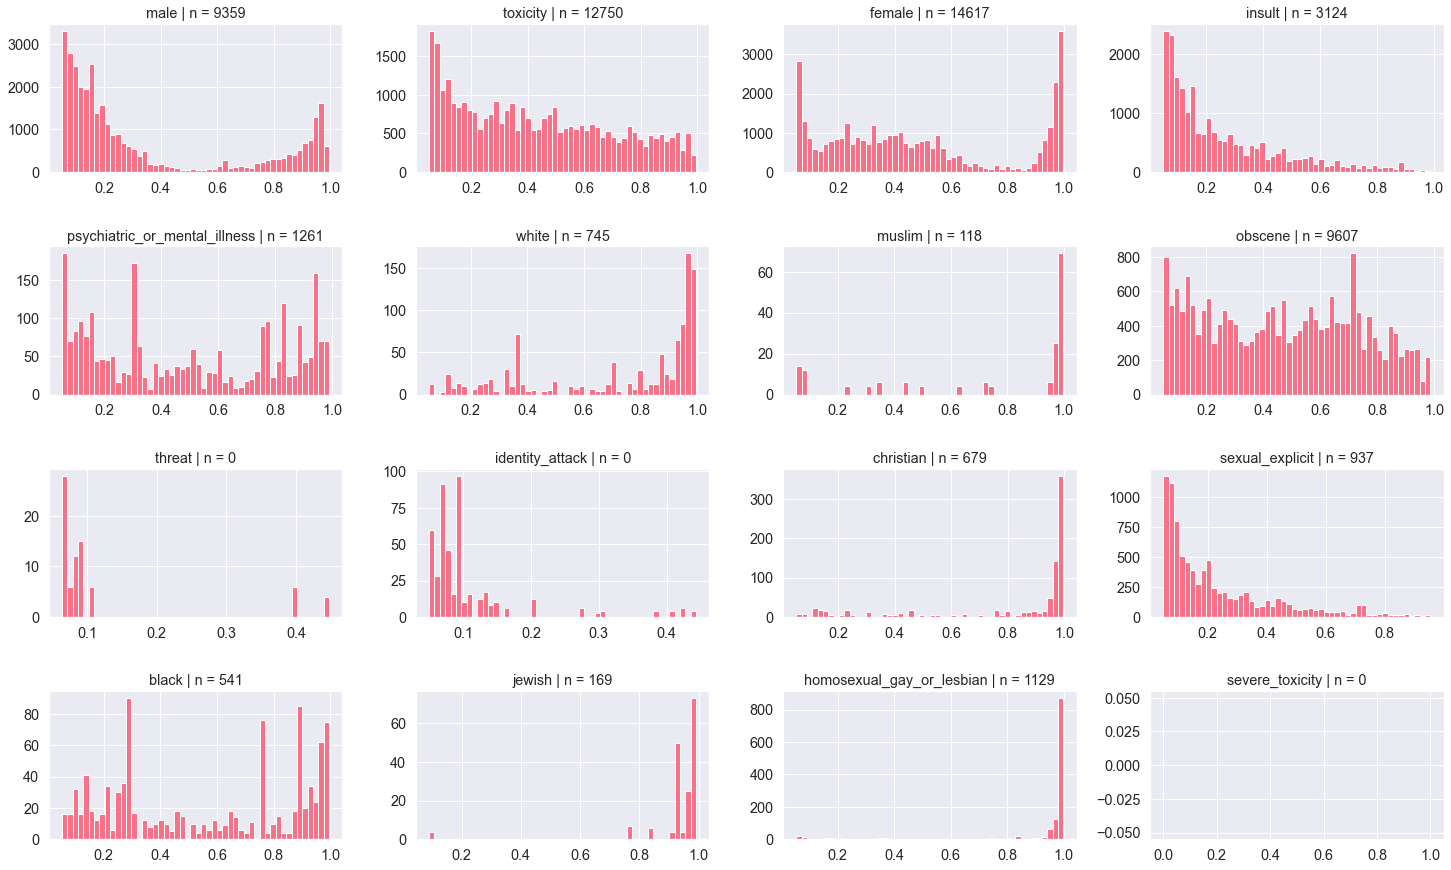

In [30]:
fig, axs = plt.subplots(4, 4, figsize=(25, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.25)
axs = axs.ravel()

for i, col in enumerate(mtox_comp_train.df.columns):
    
    # Attribute
    values = mtox_comp_train.df[col]
    
    # Filter attribute
    fvalues = values[values > .5]
    
    axs[i].hist(values[values > .05], bins=50)
    axs[i].set_title(f'{col} | n = {len(fvalues)}')

In [ ]:
emotions_model = Factors(
    df=pd.DataFrame([dfAxis.iloc[n].article, dfAxis.iloc[n].title, dfAxis.iloc[n].text]),
    target=0,
    task="text-classification",
    model = "j-hartmann/emotion-english-distilroberta-base",
)

emotions_model.data

In [ ]:
political_model = Factors(
    df=pd.DataFrame([dfAxis.iloc[n].article, dfAxis.iloc[n].title, dfAxis.iloc[n].text]),
    target=0,
    task="text-classification",
    model = "m-newhauser/distilbert-political-tweets",
)

political_model.data